## 1. The monthly ambulatory visit shown in the following occurred in an outpatient clinic.

In [ ]:
ambulatory <- read.table("assign3_ques1.txt", sep="\t", header=TRUE)
ambulatory

Months,Visits
<chr>,<int>
January,1620
February,1567
March,1968
April,1757
May,1633
June,1865


###A. Predict visits for July using the naive forecast method.

In [ ]:
naive_july <- ambulatory$Visits[ambulatory$Months == 'June']
naive_july

[1] 1865

### B. Predict visits for July using a two-period moving average.

In [ ]:
two_period_july <- mean(tail(ambulatory$Visits, 2))
two_period_july

[1] 1749

### C. Predict visits for July using a four-period moving average.

In [ ]:
four_period_july <- mean(tail(ambulatory$Visits, 4))
four_period_july
# visits for july using 4-period moving average is 1806.

[1] 1805.75

## 2. For the following data:

In [ ]:
days <- read.table("assign3_ques2.txt", sep="\t", header=TRUE)
days

Month,Patient.days
<chr>,<int>
January,434
February,483
March,412
April,423
May,484
June,453
July,433
August,404
September,464


### A. Predict naive forecasts of patient days for February and June.

In [ ]:
february <- days$Patient.days[days$Month == 'February']
cat('Patient days for February: ', february, '\n')

june <- days$Patient.days[days$Month == 'June']
cat('Patient days for February: ', june)

Patient days for February:  483 
Patient days for February:  453

### B. Predict the patient days for January using a four-period moving average.

In [ ]:
four_period_january <- mean(tail(days$Patient.days, 4))
cat('Patient days for January:', four_period_january)
# patient days for january is 453

Patient days for January: 452.5

### C. Predict the patient days for January, using the six-period moving average

In [ ]:
six_period_january <- mean(tail(days$Patient.days, 6))
cat('Patient days for January:', six_period_january)
# patient days for january is 442

Patient days for January: 441.1667

### D. Plot the actual data and the results of the four-period and the six-period moving averages. Which method is a better predictor?

In [ ]:
four_day_moving_average <- numeric(length(days$Patient.days))
six_day_moving_average <- numeric(length(days$Patient.days))

# Calculate the four-period moving average
for (i in 4:length(days$Patient.days)) {  # iteration starts from fourth element and continues to end of vector
  four_day_moving_average[i] <- mean(days$Patient.days[(i - 3):i]) # mean of i and previous 3 elements
}

# Calculate the six-period moving average
for (i in 6:length(days$Patient.days)) {
  six_day_moving_average[i] <- mean(days$Patient.days[(i - 5):i])
}

# add NA for first three values
four_day_moving_average[1:3] <- NA
six_day_moving_average[1:5] <- NA

# Add the moving averages as a new column
days$Four_Day_Moving_Average <- four_day_moving_average
days$Six_Day_Moving_Average <- six_day_moving_average

# Convert month column into a factor
days$Month <- as.factor(days$Month)

# Print the dataframe with the new column
days

Month,Patient.days,Four_Day_Moving_Average,Six_Day_Moving_Average
<fct>,<int>,<dbl>,<dbl>
January,434,NA,NA
February,483,NA,NA
March,412,NA,NA
April,423,438.00,NA
May,484,450.50,NA
June,453,443.00,448.1667
July,433,448.25,448.0000
August,404,443.50,434.8333
September,464,438.50,443.5000


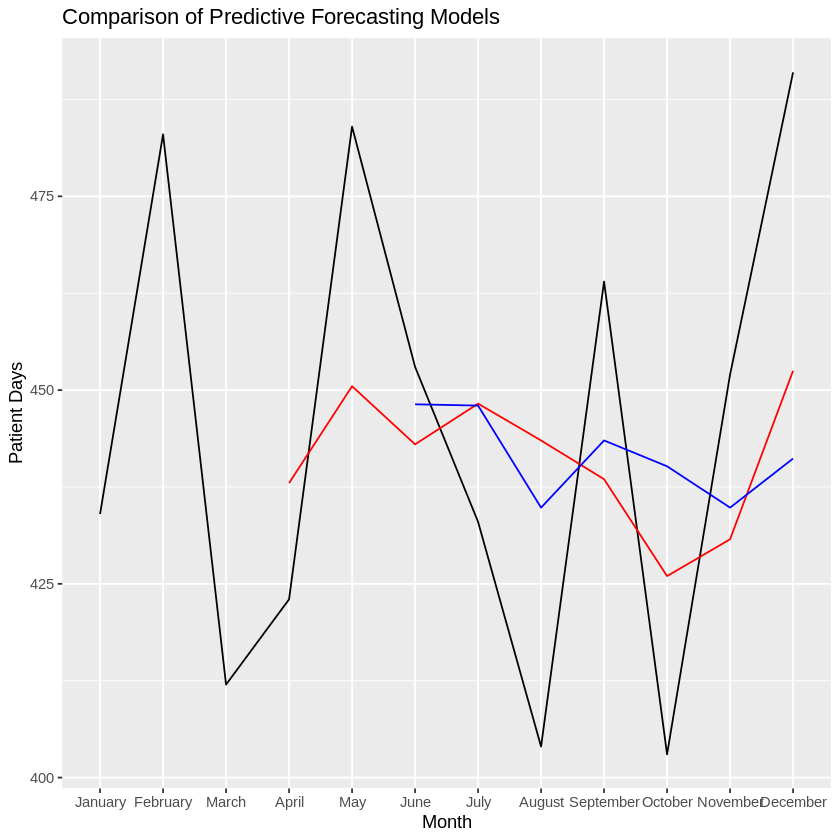

In [ ]:
ggplot(days, aes(x = factor(Month, levels=unique(Month)), group=1)) +
  geom_line(aes(y = Patient.days), color='black') +
  geom_line(aes(y = Four_Day_Moving_Average), color = "red", na.rm=TRUE) +
  geom_line(aes(y = Six_Day_Moving_Average), color = "blue", na.rm=TRUE) +
  labs(x = "Month", y='Patient Days', title='Comparison of Predictive Forecasting Models')

Six day moving average is the better predictor since it's starting to get that up and down trend that we see in the actual data.

Have to calculate the MAE dor the two models to distinguish which one is better. You can't tell from the graph alone

## Question 3: Using Data from Q1

In [ ]:
ambulatory

Months,Visits
<chr>,<int>
January,1620
February,1567
March,1968
April,1757
May,1633
June,1865


### A. Prepare a forecast for July visits using simple exponential smoothing with α = 0.3

In [ ]:
ambulatory$a_0.3[1] <- NA
ambulatory$a_0.3[2] <- ambulatory$Visits[1]

# Calculate forecasts for a=0.3
for (i in 3:nrow(ambulatory)) {
  ambulatory$a_0.3[i] <- ambulatory$a_0.3[i - 1] + 0.3 * (ambulatory$Visits[i] - ambulatory$a_0.3[i - 1])}

ambulatory

Months,Visits,a_0.3
<chr>,<int>,<dbl>
January,1620,NA
February,1567,1620.000
March,1968,1724.400
April,1757,1734.180
May,1633,1703.826
June,1865,1752.178


In [ ]:
# Prepare the forcast for July
predicted_june <- ambulatory$a_0.3[ambulatory$Months == 'June']
actual_june <- ambulatory$Visits[ambulatory$Months == 'June']

july_a_0.3 <- predicted_june + 0.3*(actual_june - predicted_june)
cat('Forecast for july:', july_a_0.3)

Forecast for july: 1786.025

### B. If α = 0.5, what is the predicted value for July visits?

In [ ]:
ambulatory$a_0.5[1] <- NA
ambulatory$a_0.5[2] <- ambulatory$Visits[1]

# Calculate forecasts for a=0.5
for (i in 3:nrow(ambulatory)) {
  ambulatory$a_0.5[i] <- ambulatory$a_0.5[i - 1] + 0.5 * (ambulatory$Visits[i] - ambulatory$a_0.5[i - 1])}

ambulatory

Months,Visits,a_0.3,a_0.5
<chr>,<int>,<dbl>,<dbl>
January,1620,NA,NA
February,1567,1620.000,1620.000
March,1968,1724.400,1794.000
April,1757,1734.180,1775.500
May,1633,1703.826,1704.250
June,1865,1752.178,1784.625


In [ ]:
# Prepare the forcast for July
predicted_june <- ambulatory$a_0.5[ambulatory$Months == 'June']
actual_june <- ambulatory$Visits[ambulatory$Months == 'June']

july_a_0.5 <- predicted_june + 0.5*(actual_june - predicted_june)
cat('Forecast for july:', july_a_0.5)

Forecast for july: 1824.812

### C. If α = 0.0, what is the predicted value for July visits?

In [ ]:
ambulatory$a_0[1] <- NA
ambulatory$a_0[2] <- ambulatory$Visits[1]

# Calculate forecasts for a=0.0
for (i in 3:nrow(ambulatory)) {
  ambulatory$a_0[i] <- ambulatory$a_0[i - 1] + 0}

ambulatory

Months,Visits,a_0.3,a_0.5,a_0
<chr>,<int>,<dbl>,<dbl>,<dbl>
January,1620,NA,NA,NA
February,1567,1620.000,1620.000,1620
March,1968,1724.400,1794.000,1620
April,1757,1734.180,1775.500,1620
May,1633,1703.826,1704.250,1620
June,1865,1752.178,1784.625,1620


In [ ]:
# Prepare the forcast for July
predicted_june <- ambulatory$a_0[ambulatory$Months == 'June']
actual_june <- ambulatory$Visits[ambulatory$Months == 'June']

july_a_0 <- predicted_june + 0*(actual_june - predicted_june)
cat('Forecast for july:', july_a_0)

Forecast for july: 1620

### D. If α = 1.0, what is the predicted value for July visits?

In [ ]:
ambulatory$a_1[1] <- NA
ambulatory$a_1[2] <- ambulatory$Visits[1]

# Calculate forecasts for a=1.0
for (i in 1:nrow(ambulatory)) {
  if(i == 1) {
    ambulatory$a_1[i] <- ambulatory$Visits[i]
  } else {
  ambulatory$a_1[i] <- ambulatory$a_1[i - 1] + (ambulatory$Visits[i] - ambulatory$a_1[i - 1])
  }
}

ambulatory

Months,Visits,a_0.3,a_0.5,a_0,a_1
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
January,1620,NA,NA,NA,1620
February,1567,1620.000,1620.000,1620,1567
March,1968,1724.400,1794.000,1620,1968
April,1757,1734.180,1775.500,1620,1757
May,1633,1703.826,1704.250,1620,1633
June,1865,1752.178,1784.625,1620,1865


In [ ]:
# Prepare the forcast for July
predicted_june <- ambulatory$a_1[ambulatory$Months == 'June']
actual_june <- ambulatory$Visits[ambulatory$Months == 'June']

july_a_1 <- predicted_june + (actual_june - predicted_june)
cat('Forecast for july:', july_a_1)

Forecast for july: 1865

## Question 4: You are a data analyst working at a hospital and the hospital's pharmacy department has requested your expertise in conducting a time series forecasting analysis to predict future drug orders. You have access to a dataset named drug_orders.csv, which contains historical drug order data. Date records the date of each drug order, and Drug_Orders logs the number of drug orders placed on each day.
1. Fit an ETS and an Auto ARIMA model to predict January 2023's drug orders.
2. Compare these models' predictions for the month of December 2022.
3. Which model is the better predictor?

In [1]:
install.packages("forecast")
install.packages("MLmetrics")
library(forecast)
library(MLmetrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall




In [25]:
drug_orders_data <- read.csv("drug_orders.csv")
data_ts <- ts(drug_orders_data$Drug_Orders, start=c(2022, 1), frequency=365)

In [18]:
# Fit an ETS and an Auto ARIMA model to predict January 2023's drug orders.
ets_model <- ets(data_ts, allow.multiplicative.trend = TRUE) # there are 31 days in January
ets_forecast = forecast(ets_model, h=31)

auto_arima_model <- auto.arima(data_ts)
arima_forecast <- forecast(auto_arima_model, h=31)

In [19]:
# Comparing the models' predictions for Dec 2022
training <- window(data_ts, start = c(2022, 1), end = c(2022, 334))
validation <- window(data_ts, start = c(2022, 335))

ets_model <- ets(training, allow.multiplicative.trend = TRUE)
ets_forecast_december = forecast(ets_model, h=length(validation))

auto_arima_model <- auto.arima(training)
arima_forecast_december <- forecast(auto_arima_model, h=length(validation))

In [24]:
# Which model is the better predictor?

ets_mape <- MAPE(ets_forecast_december$mean, validation)
ets_average_mape <- mean(ets_mape)*100

arima_mape <- MAPE(arima_forecast_december$mean, validation)
arima_average_mape <- mean(arima_mape)*100

ets_average_mape
arima_average_mape

[1] 19.92008

[1] 19.92073

## Question 5:  Using the first 80% of glucose values from 563-ws-training.xml, forecast the remaining 20% of the glucose values using SES and DSHW methods. Demonstrate using the appropriate metrics, which of the models is a better predictor of future glucose values. (5 points)

In [ ]:
install.packages('XML')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(XML)

In [ ]:
xmlFile <- xmlParse("563-ws-training.xml")

In [ ]:
# training data
# getting <event...> Nodes from the XML using XPath
events <- getNodeSet(xmlFile, "//patient/glucose_level/event")

# extracting the timestamps from event tag
glucoseTimes <- sapply(events, function(x){as.POSIXct(xmlAttrs(x)[["ts"]], format="%d-%m-%Y %H:%M:%S")})
glucoseTimes <- as.POSIXct(glucoseTimes, origin = "1970-01-01")

# extracting the value from event tag
glucoseVals <- sapply(events, function(x){as.numeric(xmlAttrs(x)[["value"]])})

# create dataframe
df <- data.frame(glucoseTimes, glucoseVals)
head(df)

,glucoseTimes,glucoseVals
,<dttm>,<dbl>
1,2021-09-13 12:33:00,219
2,2021-09-13 12:38:00,229
3,2021-09-13 12:43:00,224
4,2021-09-13 12:48:00,221
5,2021-09-13 12:53:00,215
6,2021-09-13 12:58:00,209


In [ ]:
split <- round(nrow(df)*0.8) # taking 80% of rows in dataset and ensuring it's a whole number

# extract the first 80% of values for training
training <- df[1 : split,]
testing <- df[(split+1) : nrow(df),]

dim(training)
dim(testing)

[1] 9699    2

[1] 2425    2

In [ ]:
# forecast using SES model
ses_model <- ets(training[,2], allow.multiplicative.trend = TRUE)
ses_forecast <- forecast(ses_model, h=length(testing[,2]))

# forecast using DSHW model
dshw_model <- dshw(training[,2], period1=7, period2 = 7*52, h=length(testing[,2]))
dswh_forecast <- forecast(dshw_model, h=length(testing[,2]))

In [ ]:
# Which model is better?
ses_MAPE <- MAPE(ses_forecast$mean, testing[,2])
ses_RMSE <- RMSE(ses_forecast$mean, testing[,2])
ses_r2 <- R2_Score(ses_forecast$mean, testing[,2])

cat('SES model:\n')
cat('MAPE:', round(ses_MAPE,2), '\n')
cat('RMSE:', round(ses_RMSE,2), '\n')
cat('R2:', round(ses_r2,2), '\n')

dshw_MAPE <- MAPE(dswh_forecast$mean, testing[,2])
dshw_RMSE <- RMSE(dswh_forecast$mean, testing[,2])
dshw_r2 <- R2_Score(dswh_forecast$mean, testing[,2])

cat('\nDSHW model:\n')
cat('MAPE:', round(dshw_MAPE,2), '\n')
cat('RMSE:', round(dshw_RMSE,2), '\n')
cat('R2:', round(dshw_r2,2), '\n')

SES model:
MAPE: 0.28 
RMSE: 59.48 
R2: -0.38 

DSHW model:
MAPE: 16.2 
RMSE: 2833.28 
R2: -3125.83 
